In [16]:
import numpy as np
import pandas as pd

In [17]:
income = np.array([1.7, 2.3, 3.5, 10, 4.2, 2.3, 1.7, 2.2, 3.5, 5.1, 
           9.5, 9.5, 1.7, 2.3, 3.5, 1.7, 2.3, 5.1, 4.7, 2.3, 
           4.7, 12])

In [18]:
uniqVal, counts = np.unique(np.sort(np.append(income, 0)), return_counts=True)
counts[0] = 0
stat = pd.DataFrame({"UniqVal":uniqVal, "Counts":counts})
stat

,UniqVal,Counts
0,0.0,0
1,1.7,4
2,2.2,1
3,2.3,5
4,3.5,3
5,4.2,1
6,4.7,2
7,5.1,2
8,9.5,2
9,10.0,1


In [19]:
stat["totalVal"] = stat["UniqVal"] * stat['Counts']
stat["totalValCum"] = stat["totalVal"].cumsum()
stat["totalValRatio"] = stat["totalValCum"] / stat["totalValCum"].max()
stat

,UniqVal,Counts,totalVal,totalValCum,totalValRatio
0,0.0,0,0.0,0.0,0.000000
1,1.7,4,6.8,6.8,0.070981
2,2.2,1,2.2,9.0,0.093946
3,2.3,5,11.5,20.5,0.213987
4,3.5,3,10.5,31.0,0.323591
5,4.2,1,4.2,35.2,0.367432
6,4.7,2,9.4,44.6,0.465553
7,5.1,2,10.2,54.8,0.572025
8,9.5,2,19.0,73.8,0.770355
9,10.0,1,10.0,83.8,0.874739


In [20]:
stat["countCum"] = stat["Counts"].cumsum()
stat["countRatio"] = stat["countCum"] / stat["countCum"].max()
stat

,UniqVal,Counts,totalVal,totalValCum,totalValRatio,countCum,countRatio
0,0.0,0,0.0,0.0,0.000000,0,0.000000
1,1.7,4,6.8,6.8,0.070981,4,0.181818
2,2.2,1,2.2,9.0,0.093946,5,0.227273
3,2.3,5,11.5,20.5,0.213987,10,0.454545
4,3.5,3,10.5,31.0,0.323591,13,0.590909
5,4.2,1,4.2,35.2,0.367432,14,0.636364
6,4.7,2,9.4,44.6,0.465553,16,0.727273
7,5.1,2,10.2,54.8,0.572025,18,0.818182
8,9.5,2,19.0,73.8,0.770355,20,0.909091
9,10.0,1,10.0,83.8,0.874739,21,0.954545


<Axes: xlabel='countRatio'>

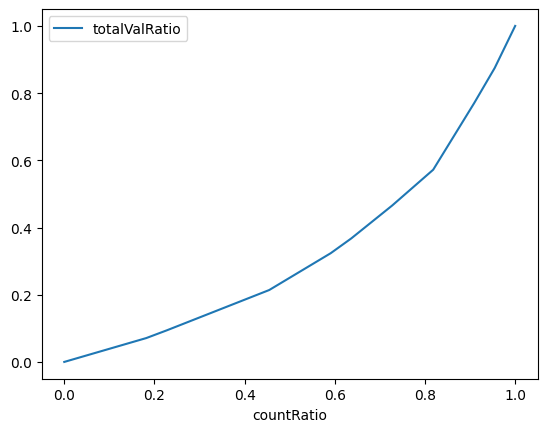

In [21]:
stat.plot(x="countRatio", y="totalValRatio")

In [22]:
np.trapz(y=stat["totalValRatio"], x=stat["countRatio"])

0.3235908141962422

In [23]:
(0.5-np.trapz(y=stat["totalValRatio"], x=stat["countRatio"]))/0.5

0.3528183716075156

In [10]:
from scipy.stats import differential_entropy
from entropy_estimators import continuous

In [14]:
# compute the entropy from the determinant of the 
# multivariate normal distribution:
analytic = continuous.get_h_mvn(income)

# compute the entropy using the k-nearest neighbour approach
# developed by Kozachenko and Leonenko (1987):
kozachenko = continuous.get_h(income, k=5)

# compute the entropy using SCI Differential entropy
SCI = differential_entropy(income)

print(f"analytic result: {analytic:.5f}")
print(f"K-L estimator: {kozachenko:.5f}")
print(f"SCI result: {SCI:.5f}")


analytic result: 2.54777
K-L estimator: 1.89699
SCI result: 1.96193
